In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('DataSets/bank.csv', sep=';')
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [4]:
data['y'] = (data['y']=='yes').astype(int)

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [6]:
data['y'].unique()

array([0, 1])

In [7]:
data['y'].value_counts()

y
0    3668
1     451
Name: count, dtype: int64

In [8]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [9]:
data['education'] = np.where(data['education'] == 'basic.4y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.6y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.8y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.9y', 'Basic', data['education'])

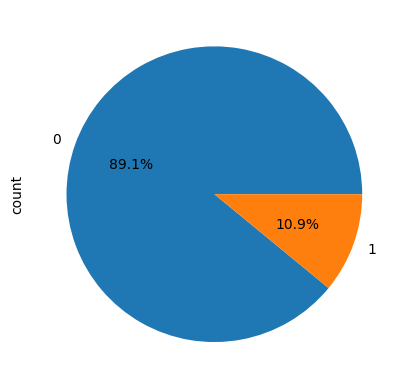

In [10]:
data['y'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [11]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695,0.109493
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904,0.312294
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [12]:
table = pd.crosstab(data['marital'], data['y'])
table

y,0,1
marital,,
divorced,403,43
married,2257,252
single,998,155
unknown,10,1


y,0,1
marital,,
divorced,403,43
married,2257,252
single,998,155
unknown,10,1


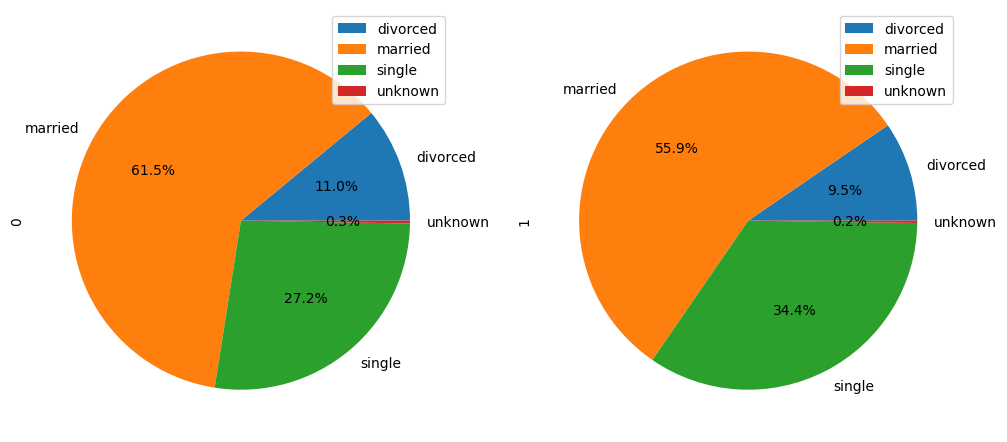

In [13]:
table.plot(kind='pie', autopct='%1.1f%%', subplots=True, figsize=(12,6.5))
table

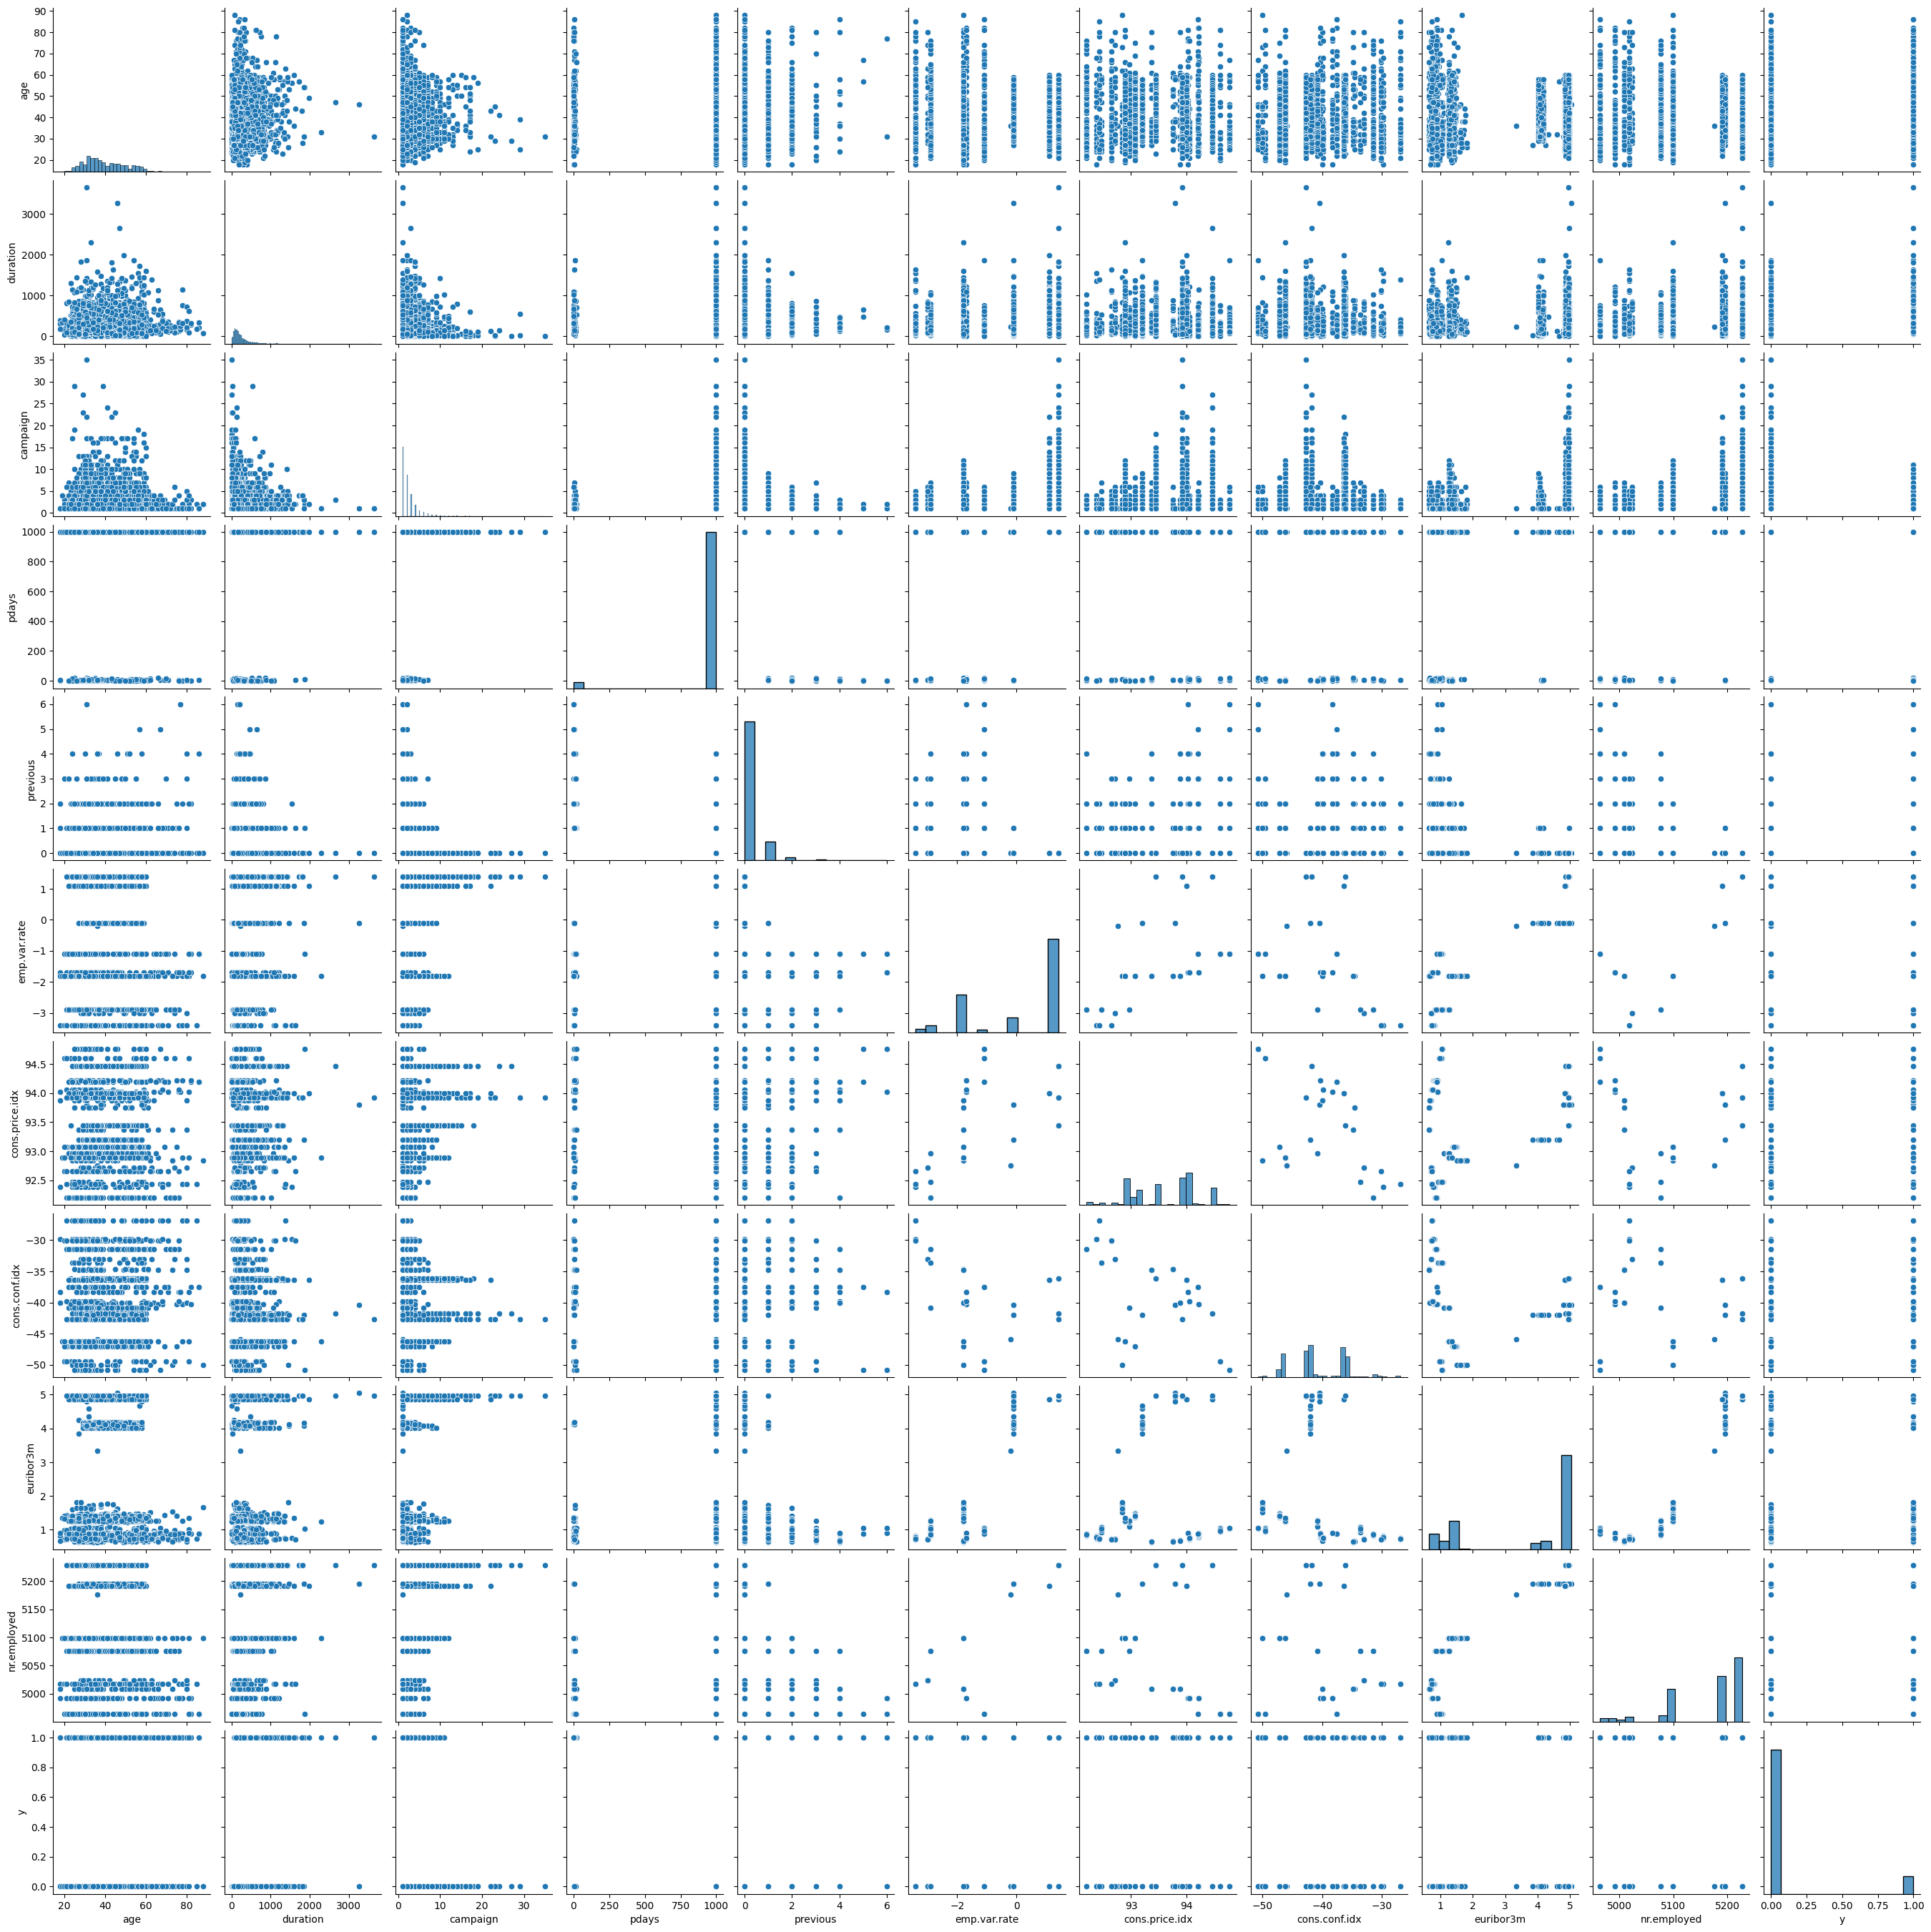

In [14]:
sns.pairplot(data)

In [15]:
categories = ['job', 'marital', 'education', 'loan', 'contact', 'housing', 'month', 'day_of_week', 'poutcome', 'default']

In [16]:
for category in categories:
    cat_list = 'cat' + '_' + category
    cat_dummies = pd.get_dummies(data[category], prefix = category).astype(int)
    data = data.join(cat_dummies)

In [17]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,default_no,default_unknown,default_yes
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,...,0,0,0,0,0,1,0,1,0,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,0,0,0,0,0,1,0,1,0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,0,0,0,1,0,1,0,1,0,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,...,0,0,0,0,0,1,0,1,0,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,0,0,0,0,1,0,1,0,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            4119 non-null   int64  
 1   job                            4119 non-null   object 
 2   marital                        4119 non-null   object 
 3   education                      4119 non-null   object 
 4   default                        4119 non-null   object 
 5   housing                        4119 non-null   object 
 6   loan                           4119 non-null   object 
 7   contact                        4119 non-null   object 
 8   month                          4119 non-null   object 
 9   day_of_week                    4119 non-null   object 
 10  duration                       4119 non-null   int64  
 11  campaign                       4119 non-null   int64  
 12  pdays                          4119 non-null   i

In [19]:
data_vars = data.columns.values.tolist()

In [20]:
to_keep = [v for v in data_vars if v not in categories]

In [21]:
to_keep

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',

In [22]:
data_bank = data[to_keep]

In [23]:
data_bank.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,default_no,default_unknown,default_yes
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,0,0,0,1,0,1,0,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,0,0,0,1,0,1,0,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,1,0,1,0,1,0,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,0,0,0,1,0,1,0,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,1,0,0,0,0,1,0,1,0,0


In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [25]:
x = [x for x in to_keep if x!='y']
x = np.array(data_bank[x])
y = np.array(data_bank['y'])

In [26]:
log = LogisticRegression()

In [27]:
rfe = RFE(log, n_features_to_select=12)

In [28]:
rfe = rfe.fit(x,y)

/home/fisica6/anaconda3/envs/Dewin_Soto/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/fisica6/anaconda3/envs/Dewin_Soto/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

In [29]:
rfe.support_

array([False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False])

In [30]:
rfe.ranking_

array([35, 44, 22, 46,  1, 18, 30, 26,  1, 41,  2, 14, 12, 42, 13,  1,  9,
       25,  3,  1,  1, 47, 19, 33, 31, 49, 20, 15, 48, 24, 34,  8, 16,  7,
       40, 21,  5, 10, 23, 45,  1,  6,  1, 27,  4,  1,  1,  1, 39, 17, 43,
       29, 36, 28, 11,  1, 37,  1, 38, 32, 50])

In [31]:
lists = [x for x in to_keep if x != 'y']

In [32]:
lists = list(zip(lists,rfe.ranking_))
lists

[('age', np.int64(35)),
 ('duration', np.int64(44)),
 ('campaign', np.int64(22)),
 ('pdays', np.int64(46)),
 ('previous', np.int64(1)),
 ('emp.var.rate', np.int64(18)),
 ('cons.price.idx', np.int64(30)),
 ('cons.conf.idx', np.int64(26)),
 ('euribor3m', np.int64(1)),
 ('nr.employed', np.int64(41)),
 ('job_admin.', np.int64(2)),
 ('job_blue-collar', np.int64(14)),
 ('job_entrepreneur', np.int64(12)),
 ('job_housemaid', np.int64(42)),
 ('job_management', np.int64(13)),
 ('job_retired', np.int64(1)),
 ('job_self-employed', np.int64(9)),
 ('job_services', np.int64(25)),
 ('job_student', np.int64(3)),
 ('job_technician', np.int64(1)),
 ('job_unemployed', np.int64(1)),
 ('job_unknown', np.int64(47)),
 ('marital_divorced', np.int64(19)),
 ('marital_married', np.int64(33)),
 ('marital_single', np.int64(31)),
 ('marital_unknown', np.int64(49)),
 ('education_Basic', np.int64(20)),
 ('education_high.school', np.int64(15)),
 ('education_illiterate', np.int64(48)),
 ('education_professional.course',

In [33]:
col = ['previous', 'euribor3m', 'job_retired', 'job_technician', 'job_unemployed', 'month_apr','month_dec', 'month_mar', 'month_may', 'month_nov', 'poutcome_failure', 'poutcome_success']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x = np.array(data[col])

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [37]:
log.fit(x_train,y_train)

LogisticRegression()

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
score = cross_val_score(log,x_train, y_train, scoring='accuracy', cv=10)

In [40]:
score

array([0.89090909, 0.90909091, 0.88787879, 0.88787879, 0.88787879,
       0.90881459, 0.89665653, 0.90881459, 0.89057751, 0.9118541 ])

In [41]:
score.mean()

np.float64(0.8980353688864329)

In [42]:
y_pred = log.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, roc_auc_score

In [44]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[738,   7],
       [ 63,  16]])

In [45]:
accuracy_score(y_test, y_pred)

0.9150485436893204

In [46]:
fpr, tpr, umbrals = roc_curve(y_test, y_pred)

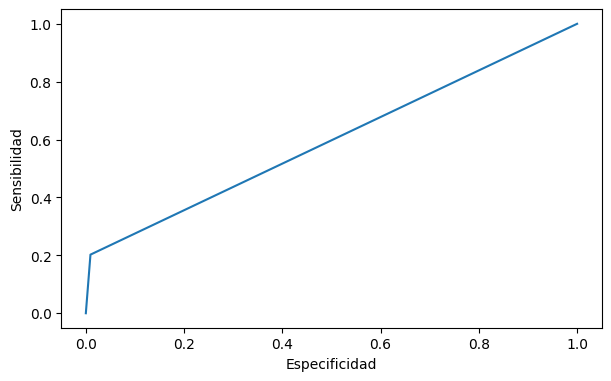

In [47]:
fig, ax = plt.subplots(1, figsize=(6,3.7), layout='constrained')
ax.plot(fpr, tpr)
ax.set_xlabel('Especificidad')
ax.set_ylabel('Sensibilidad')
plt.show()

In [50]:
roc_auc_score(y_test,y_pred)

np.float64(0.5965678362076289)

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       745
           1       0.70      0.20      0.31        79

    accuracy                           0.92       824
   macro avg       0.81      0.60      0.63       824
weighted avg       0.90      0.92      0.89       824



In [51]:
log1 = LogisticRegression(class_weight='balanced')

In [52]:
log1.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [53]:
y_pred1 = log1.predict(x_test)

In [54]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       745
           1       0.24      0.65      0.35        79

    accuracy                           0.77       824
   macro avg       0.60      0.71      0.60       824
weighted avg       0.89      0.77      0.81       824



In [55]:
fpr1, tpr1, umbrals1 = roc_curve(y_test, y_pred1)

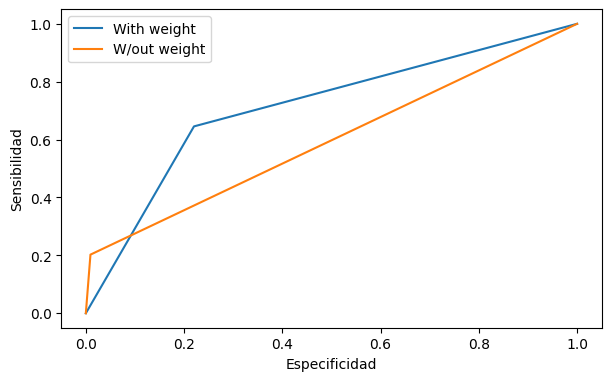

In [57]:
fig, ax = plt.subplots(1, figsize=(6,3.7), layout='constrained')
ax.plot(fpr1, tpr1, label='With weight')
ax.plot(fpr, tpr, label='W/out weight')
ax.set_xlabel('Especificidad')
ax.set_ylabel('Sensibilidad')
ax.legend()
plt.show()

In [58]:
roc_auc_score(y_test, y_pred1)

np.float64(0.7127176960326225)

## Interpolación ##

In [88]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [89]:
x, y = make_classification(n_samples=2028, n_features=10, n_classes=2, weights=[0.9, 0.1])

In [90]:
y.shape

(2028,)

In [91]:
def distribucion(y, título):
    counter = Counter(y)
    print(f'{título}:{counter}')

distribucion(y, 'Distribución de clases')

Distribución de clases:Counter({np.int64(0): 1816, np.int64(1): 212})


In [86]:
over = RandomOverSampler(sampling_strategy='auto', random_state=42)
x_over, y_over = over.fit_resample(x,y)
distribucion(y_over, 'Distribución over')

Distribución over:Counter({np.int64(0): 1826, np.int64(1): 1826})


In [92]:
under = RandomOverSampler(sampling_strategy='auto', random_state=42)
x_under, y_under = under.fit_resample(x,y)
distribucion(y_under, 'Distribución over')

Distribución over:Counter({np.int64(0): 1816, np.int64(1): 1816})


## Regresión de soporte vectorial ##

In [196]:
from sklearn.svm import SVR

In [197]:
data = pd.read_csv('DataSets/auto-mpg.csv')
data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car name      406 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


In [199]:
data = data.dropna(axis=0, how='any')

In [200]:
lists = ['horsepower', 'weight']

In [221]:
from sklearn.preprocessing import StandardScaler

x = np.array(data[lists])
y = np.array(data['displacement'])

scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y).reshape(-

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

ValueError: Expected 2D array, got 1D array instead:
array=[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  455.  113.  198.  199.  200.   97.   97.  110.  107.  104.  121.
 199.  360.  307.  318.  304.   97.  140.  113.  232.  225.  250.  250.
 232.  350.  400.  351.  318.  383.  400.  400.  258.  140.  250.  250.
 122.  116.   79.   88.   71.   72.   97.   91.  113.   97.5  97.  140.
 122.  350.  400.  318.  351.  304.  429.  350.  350.  400.   70.  304.
 307.  302.  318.  121.  121.  120.   96.  122.   97.  120.   98.   97.
 350.  304.  350.  302.  318.  429.  400.  351.  318.  440.  455.  360.
 225.  250.  232.  250.  198.   97.  400.  400.  360.  350.  232.   97.
 140.  108.   70.  122.  155.   98.  350.  400.   68.  116.  114.  121.
 318.  121.  156.  350.  198.  232.  250.   79.  122.   71.  140.  250.
 258.  225.  302.  350.  318.  302.  304.   98.   79.   97.   76.   83.
  90.   90.  116.  120.  108.   79.  225.  250.  250.  250.  400.  350.
 318.  351.  231.  250.  258.  225.  231.  262.  302.   97.  140.  232.
 140.  134.   90.  119.  171.   90.  232.  115.  120.  121.  121.   91.
 107.  116.  140.   98.  101.  305.  318.  304.  351.  225.  250.  200.
 232.   85.   98.   90.   91.  225.  250.  250.  258.   97.   85.   97.
 140.  130.  318.  120.  156.  168.  350.  350.  302.  318.   98.  111.
  79.  122.   85.  305.  260.  318.  302.  250.  231.  225.  250.  400.
 350.  400.  351.   97.  151.   97.  140.   98.   98.   97.   97.  146.
 121.   80.   90.   98.   78.   85.   91.  260.  318.  302.  231.  200.
 200.  140.  225.  232.  231.  200.  225.  258.  305.  231.  302.  318.
  98.  134.  119.  105.  134.  156.  151.  119.  131.  163.  121.  163.
  89.   98.  231.  200.  140.  232.  225.  305.  302.  351.  318.  350.
 351.  267.  360.   89.   86.   98.  121.  183.  350.  141.  260.  105.
 105.   85.   91.  151.  173.  173.  151.   98.   89.   98.   86.  151.
 140.  151.  225.   97.  134.  120.  119.  108.   86.  156.   85.   90.
  90.  121.  146.   91.   97.   89.  168.   70.  122.  107.  135.  151.
 156.  173.  135.   79.   86.   81.   97.   85.   89.   91.  105.   98.
  98.  105.  107.  108.  119.  120.  141.  145.  168.  146.  231.  350.
 200.  225.  112.  112.  112.  112.  135.  151.  140.  105.   91.   91.
 105.   98.  120.  107.  108.   91.   91.   91.  181.  262.  156.  232.
 144.  135.  151.  140.   97.  135.  120.  119. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
svr = SVR()

In [218]:
svr.fit(x_train, y_train)

SVR()

In [219]:
y_pred_r = svr.predict(x_test)

In [220]:
from sklearn.metrics import r2_score

In [214]:
r2_score(y_test, y_pred_r)

0.6891052437790213

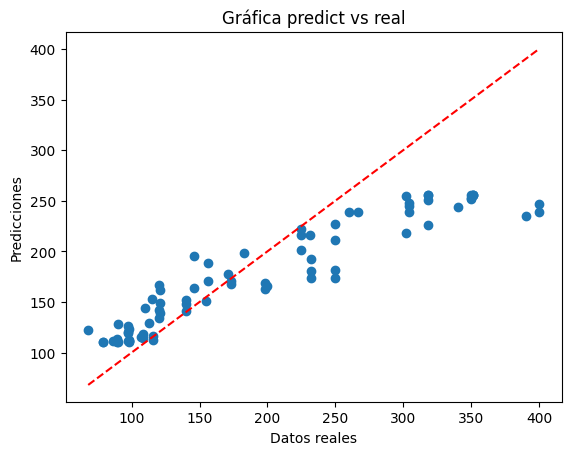

In [215]:
plt.scatter(y_test,y_pred_r)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='red', ls='--')
plt.xlabel('Datos reales')
plt.ylabel('Predicciones')
plt.title('Gráfica predict vs real')
plt.show()

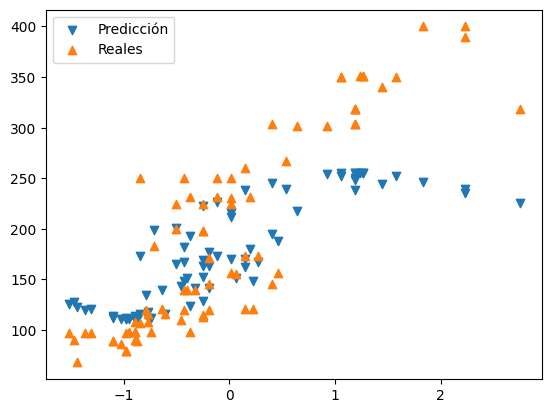

In [216]:
plt.scatter(x_test[:,0], y_pred_r, marker='v', label='Predicción')
plt.scatter(x_test[:,0], y_test, marker='^', label='Reales')
plt.legend()
plt.show()